# 泰坦尼克号幸存者预测
泰坦尼克号的沉没是世界上最严重的海难事故之一，今天我们通过分类树模型来预测一下哪些人可能成为幸存者。  
数据集https://www.kaggle.com/c/titanic ，数据集包含两个csv格式文件，data为接下来要使用的数据，test为kaggle提供的测试集。

## 1 导包

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import matplotlib.pyplot as plt

## 2 数据预处理，导入数据，探索数据

In [2]:
data = pd.read_csv("./datasets/data.csv")

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.shape

(891, 12)

In [10]:
# Cabin缺失值太多，直接删掉；Name/Ticket对结果几乎没有影响关系，删掉；
data.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)  # 参数inplace=True表示删除后覆盖原数据
# data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # 或者这样写
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
# 对比较重要的Age特征的缺失值进行填补
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [15]:
# 删除有缺失值的行
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [19]:
# 查看Embarked有多少种取值
labels_Embarked = data["Embarked"].unique().tolist()
labels_Embarked

['S', 'C', 'Q']

In [23]:
# Embarked值替换为数字
data["Embarked"] = data["Embarked"].apply(lambda x : labels_Embarked.index(x))

In [24]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [26]:
# 将Sex替换为数字
data["Sex"] = (data["Sex"] == "male").astype("int")

In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


### 分割数据，将数据和标签分割

In [28]:
X = data.iloc[:, data.columns != "Survived"]
Y = data.iloc[:, data.columns == "Survived"]

In [29]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [58]:
# 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
564,565,3,0,29.699118,0,0,8.0500,0
101,102,3,1,29.699118,0,0,7.8958,0
866,867,2,0,27.000000,1,0,13.8583,1
188,189,3,1,40.000000,1,1,15.5000,2
552,553,3,1,29.699118,0,0,7.8292,2
...,...,...,...,...,...,...,...,...
844,845,3,1,17.000000,0,0,8.6625,0
460,461,1,1,48.000000,0,0,26.5500,0
293,294,3,0,24.000000,0,0,8.8500,0
485,486,3,0,29.699118,3,1,25.4667,0


In [60]:
# 将索引重置
# Xtrain = Xtrain.reset_index(drop=True)  # 法1
for i in [Xtrain, Xtest, Ytrain, Ytest]:  # 法2
    i.index = range(i.shape[0])
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,565,3,0,29.699118,0,0,8.0500,0
1,102,3,1,29.699118,0,0,7.8958,0
2,867,2,0,27.000000,1,0,13.8583,1
3,189,3,1,40.000000,1,1,15.5000,2
4,553,3,1,29.699118,0,0,7.8292,2
...,...,...,...,...,...,...,...,...
617,845,3,1,17.000000,0,0,8.6625,0
618,461,1,1,48.000000,0,0,26.5500,0
619,294,3,0,24.000000,0,0,8.8500,0
620,486,3,0,29.699118,3,1,25.4667,0


## 3 训练数据

In [61]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7677902621722846

In [65]:
# 交叉验证
clf = DecisionTreeClassifier(random_state=25)
score_cross = cross_val_score(clf, X, Y, cv=10).mean()
score_cross

0.7469611848825333

## 4 调参

0.850187265917603


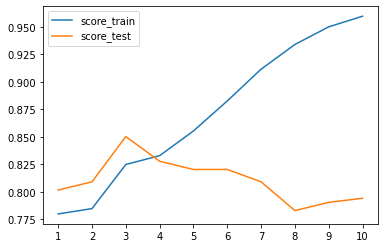

In [67]:
# 效果不如人意，调参，绘制超参数曲线
score_train = []
score_test = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_train.append(clf.score(Xtrain, Ytrain))
    score_test.append(clf.score(Xtest, Ytest))
    
print(max(score_test))
plt.plot(range(1, 11), score_train, label="score_train")
plt.plot(range(1, 11), score_test, label="score_test")
plt.xticks(range(1, 11))
plt.legend()
plt.show()

__分析发现在最大深度为3时最佳__
- 还可以尝试criterion="entropy"

0.8352059925093633


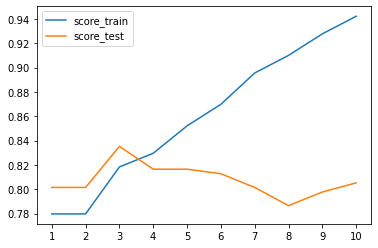

In [68]:
# 效果不如人意，调参，绘制超参数曲线
score_train = []
score_test = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_train.append(clf.score(Xtrain, Ytrain))
    score_test.append(clf.score(Xtest, Ytest))
    
print(max(score_test))
plt.plot(range(1, 11), score_train, label="score_train")
plt.plot(range(1, 11), score_test, label="score_test")
plt.xticks(range(1, 11))
plt.legend()
plt.show()

__发现用entropy更好了：测试集过拟合得到缓解，并且层数为3是测试和预测差距缩小了，所以用entropy是有效的__

### 网格搜索：能够同时调整多个参数的技术，枚举

In [72]:
import numpy as np

gini_thresholds = np.linspace(0,0.5,20)  # linspace(start, stop, num=50)在指定范围内，返回等间隔的num个数据

# parameters是一个字典，一串参数和参数对应的取值范围
parameters = {'splitter':('best','random')
             ,'criterion':("gini","entropy")
             ,"max_depth":[*range(1,10)]
             ,'min_samples_leaf':[*range(1,50,5)]
             ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain, Ytrain)
print(GS.best_params_)  # 返回最佳参数组合
print(GS.best_score_)  # 返回在最佳参数组合下的分数

{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'splitter': 'best'}
0.8120327700972861
